In [1]:
# Adding necessary libraries to Google Colab environment

# Installing the 'contextily' library for adding basemaps to plots
!pip install contextily -q

# Installing the 'splot' library for spatial data visualization
!pip install splot -q

# Installing additional libraries for spatial analysis and visualization
!pip install rasterio -q  # Library for reading and writing raster data
!pip install linearmodels==4.27 -q  # Library for linear models and instrumental variables
!pip install mapclassify -q  # Library for choropleth mapping
!pip install inequality -q  # Library for measuring economic inequality

# Installing the 'mgwr' library for performing geographically weighted regression
!pip install mgwr -q

!pip install statsmodels -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.0/142.0 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.3/61.3 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 882.2/882.2 kB 44.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 389.9/389.9 kB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.7/325.7 kB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 33.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.2/68.2 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.3/242.3 kB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 3.4 MB/s et

In [38]:
# Importing necessary libraries for data analysis and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable  # Function to create a new axis on a plot

import seaborn as sns
sns.set(style="darkgrid", context="paper", font_scale=1.02)  # Setting seaborn styles

import glob
import os
import requests
import zipfile
from io import BytesIO

import plotly.express as px
import plotly.graph_objects as go

# Importing libraries for spatial data and visualization
import geopandas as gpd
import contextily as cx

import libpysal
from libpysal import weights
from libpysal.weights import Queen

import rasterio  # Library for raster data processing
from rasterio import plot as rioplot  # Function to plot raster data
from rasterio.mask import mask  # Function for masking raster data using shapefile for zonal statistics

# Exploratory Spatial Data Analysis (ESDA) tools
import mapclassify as mc
from mapclassify import FisherJenks
import esda
from esda.moran import Moran, Moran_Local


# Spatial plotting tools
import splot
from splot.esda import moran_scatterplot, plot_moran, lisa_cluster, plot_local_autocorrelation
from splot.libpysal import plot_spatial_weights
from splot.mapping import vba_choropleth

# Library for inequality analysis
import inequality
from inequality.gini import Gini_Spatial
from inequality.gini import Gini
from inequality.theil import Theil
# Statistical modeling
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Geographically Weighted Regression (GWR) and related utilities
from mgwr.gwr import GWR, MGWR
from mgwr.sel_bw import Sel_BW
from mgwr.utils import shift_colormap, truncate_colormap

# linearmodels library provides helps performing regressions
#from linearmodels import PooledOLS  # Function to perform pooled OLS regression
#from linearmodels import PanelOLS  # Function to perform OLS regression on panel data
#from linearmodels import BetweenOLS  # Function to compute the between estimator of an OLS regression
#from linearmodels.panel.results import compare  # Function to compare results of an OLS regression

# Suppressing warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Adjust the plotting bins
import matplotlib.patches as mpatches

# Set the plotting style
sns.set_style('whitegrid')

In [6]:
gdf_wide = gpd.read_file("https://raw.githubusercontent.com/gdo-cambodia/cambodia202-1990-2022-GDPpc/refs/heads/main/wide_trend400_ln_y.geojson", encoding = "utf-8")
gdf_wide

GID_2   id         province      district  trend400_ln_y1990  \
0     KHM.1.1_2    1  BântéayMéanchey         Malai           6.428658   
1     KHM.1.2_2    2  BântéayMéanchey  MongkolBorei           7.072807   
2     KHM.1.3_2    3  BântéayMéanchey       OuChrov           7.579964   
3     KHM.1.4_2    4  BântéayMéanchey      PaoyPaet           7.186116   
4     KHM.1.5_2    5  BântéayMéanchey     PhnumSrok           6.459087   
..          ...  ...              ...           ...                ...   
197  KHM.25.3_2  136       TbongKhmum         Memot           6.516580   
198  KHM.25.4_2  137       TbongKhmum     OuReangOv           6.293991   
199  KHM.25.5_2  138       TbongKhmum   PonheaKraek           6.342667   
200  KHM.25.6_2  139       TbongKhmum         Suong           7.255817   
201  KHM.25.7_2  140       TbongKhmum   TboungKhmum           7.162787   

     trend400_ln_y1991  trend400_ln_y1992  trend400_ln_y1993  \
0             6.462579           6.496720           6.531558   
1             7.114497           7.155954           7.196684   
2             7.604713           7.629385           7.653839   
3             7.174187           7.162547           7.151818   
4             6.496592           6.534110           6.571653   
..                 ...                ...                ...   
197           6.546187           6.575860           6.605836   
198           6.349030           6.403951           6.458335   
199           6.381251           6.419887           6.458652   
200           7.265754           7.275867           7.286196   
201           7.174425           7.185569           7.195596   

     trend400_ln_y1994  trend400_ln_y1995  ...  trend400_ln_y2014  \
0             6.567528           6.606067  ...           7.779222   
1             7.236302           7.275530  ...           8.094150   
2             7.677865           7.702212  ...           8.290260   
3             7.142993           7.138545  ...           8.389999   
4             6.609190           6.647817  ...           7.656190   
..                 ...                ...  ...                ...   
197           6.636480           6.669228  ...           7.743946   
198           6.511821           6.565215  ...           7.744028   
199           6.497598           6.537378  ...           7.741661   
200           7.296869           7.309037  ...           7.845570   
201           7.203783           7.210469  ...           7.707433   

     trend400_ln_y2015  trend400_ln_y2016  trend400_ln_y2017  \
0             7.822306           7.860705           7.894797   
1             8.130964           8.164890           8.195806   
2             8.329432           8.368803           8.407856   
3             8.465601           8.538016           8.607558   
4             7.714857           7.774929           7.836202   
..                 ...                ...                ...   
197           7.797285           7.848637           7.897878   
198           7.805094           7.864698           7.922806   
199           7.818891           7.895283           7.970808   
200           7.850566           7.855076           7.860336   
201           7.781236           7.855631           7.928854   

     trend400_ln_y2018  trend400_ln_y2019  trend400_ln_y2020  \
0             7.925418           7.953499           7.979897   
1             8.223975           8.249723           8.273773   
2             8.445896           8.482479           8.517517   
3             8.674668           8.739924           8.803958   
4             7.898441           7.961285           8.024385   
..                 ...                ...                ...   
197           7.945050           7.990439           8.034572   
198           7.979487           8.035043           8.089951   
199           8.045281           8.118502           8.190371   
200           7.866986           7.875232           7.885140   
201           7.999124           8.065395         

In [7]:
# Identify wide columns
value_vars = [col for col in gdf_wide.columns if col.startswith("trend400_ln_y")]

# Reshape to long
gdf_long = gdf_wide.melt(
    id_vars=[col for col in gdf_wide.columns if col not in value_vars],  # keep IDs + geometry
    value_vars=value_vars,
    var_name="year_var",
    value_name="trend400_ln_y"
)

# Extract year from the variable name
gdf_long["year"] = gdf_long["year_var"].str.extract(r"(\d{4})").astype(int)

# Drop the original wide-style column name
gdf_long = gdf_long.drop(columns="year_var")

# Ensure it's still a GeoDataFrame
gdf_long = gdf_long.set_geometry("geometry")

# Optional: sort for tidy panel structure
gdf_long = gdf_long.sort_values(["id", "year"]).reset_index(drop=True)


In [8]:
gdf_long

GID_2   id         province  district  \
0     KHM.1.1_2    1  BântéayMéanchey     Malai   
1     KHM.1.1_2    1  BântéayMéanchey     Malai   
2     KHM.1.1_2    1  BântéayMéanchey     Malai   
3     KHM.1.1_2    1  BântéayMéanchey     Malai   
4     KHM.1.1_2    1  BântéayMéanchey     Malai   
...         ...  ...              ...       ...   
6661  KHM.9.7_2  202         KaôhKong  ThmaBang   
6662  KHM.9.7_2  202         KaôhKong  ThmaBang   
6663  KHM.9.7_2  202         KaôhKong  ThmaBang   
6664  KHM.9.7_2  202         KaôhKong  ThmaBang   
6665  KHM.9.7_2  202         KaôhKong  ThmaBang   

                                               geometry  trend400_ln_y  year  
0     MULTIPOLYGON (((102.6339 13.5608, 102.64 13.56...       6.428658  1990  
1     MULTIPOLYGON (((102.6339 13.5608, 102.64 13.56...       6.462579  1991  
2     MULTIPOLYGON (((102.6339 13.5608, 102.64 13.56...       6.496720  1992  
3     MULTIPOLYGON (((102.6339 13.5608, 102.64 13.56...       6.531558  1993  
4     MULTIPOLYGON (((102.6339 13.5608, 102.64 13.56...       6.567528  1994  
...                                                 ...            ...   ...  
6661  MULTIPOLYGON (((103.4701 11.3966, 103.4679 11....       7.852298  2018  
6662  MULTIPOLYGON (((103.4701 11.3966, 103.4679 11....       7.881742  2019  
6663  MULTIPOLYGON (((103.4701 11.3966, 103.4679 11....       7.910243  2020  
6664  MULTIPOLYGON (((103.4701 11.3966, 103.4679 11....       7.938195  2021  
6665  MULTIPOLYGON (((103.4701 11.3966, 103.4679 11....       7.965968  2022  

[6666 rows x 7 columns]

In [9]:
px.strip(
    gdf_long,
    x="trend400_ln_y",
    y="district",
    color="province",
    animation_frame= 'year',
    range_x = [gdf_long["trend400_ln_y"].min(), gdf_long["trend400_ln_y"].max()],
    hover_name="district",
    hover_data=["province","district","trend400_ln_y"]
)

In [10]:
fig = px.line(
    gdf_long,
    x="year",
    y="trend400_ln_y",
    color="province",
    hover_data=["province", "district","trend400_ln_y"]
)

fig.show()

(np.float64(102.069105),
 np.float64(107.89239500000001),
 np.float64(9.674765),
 np.float64(14.929135))

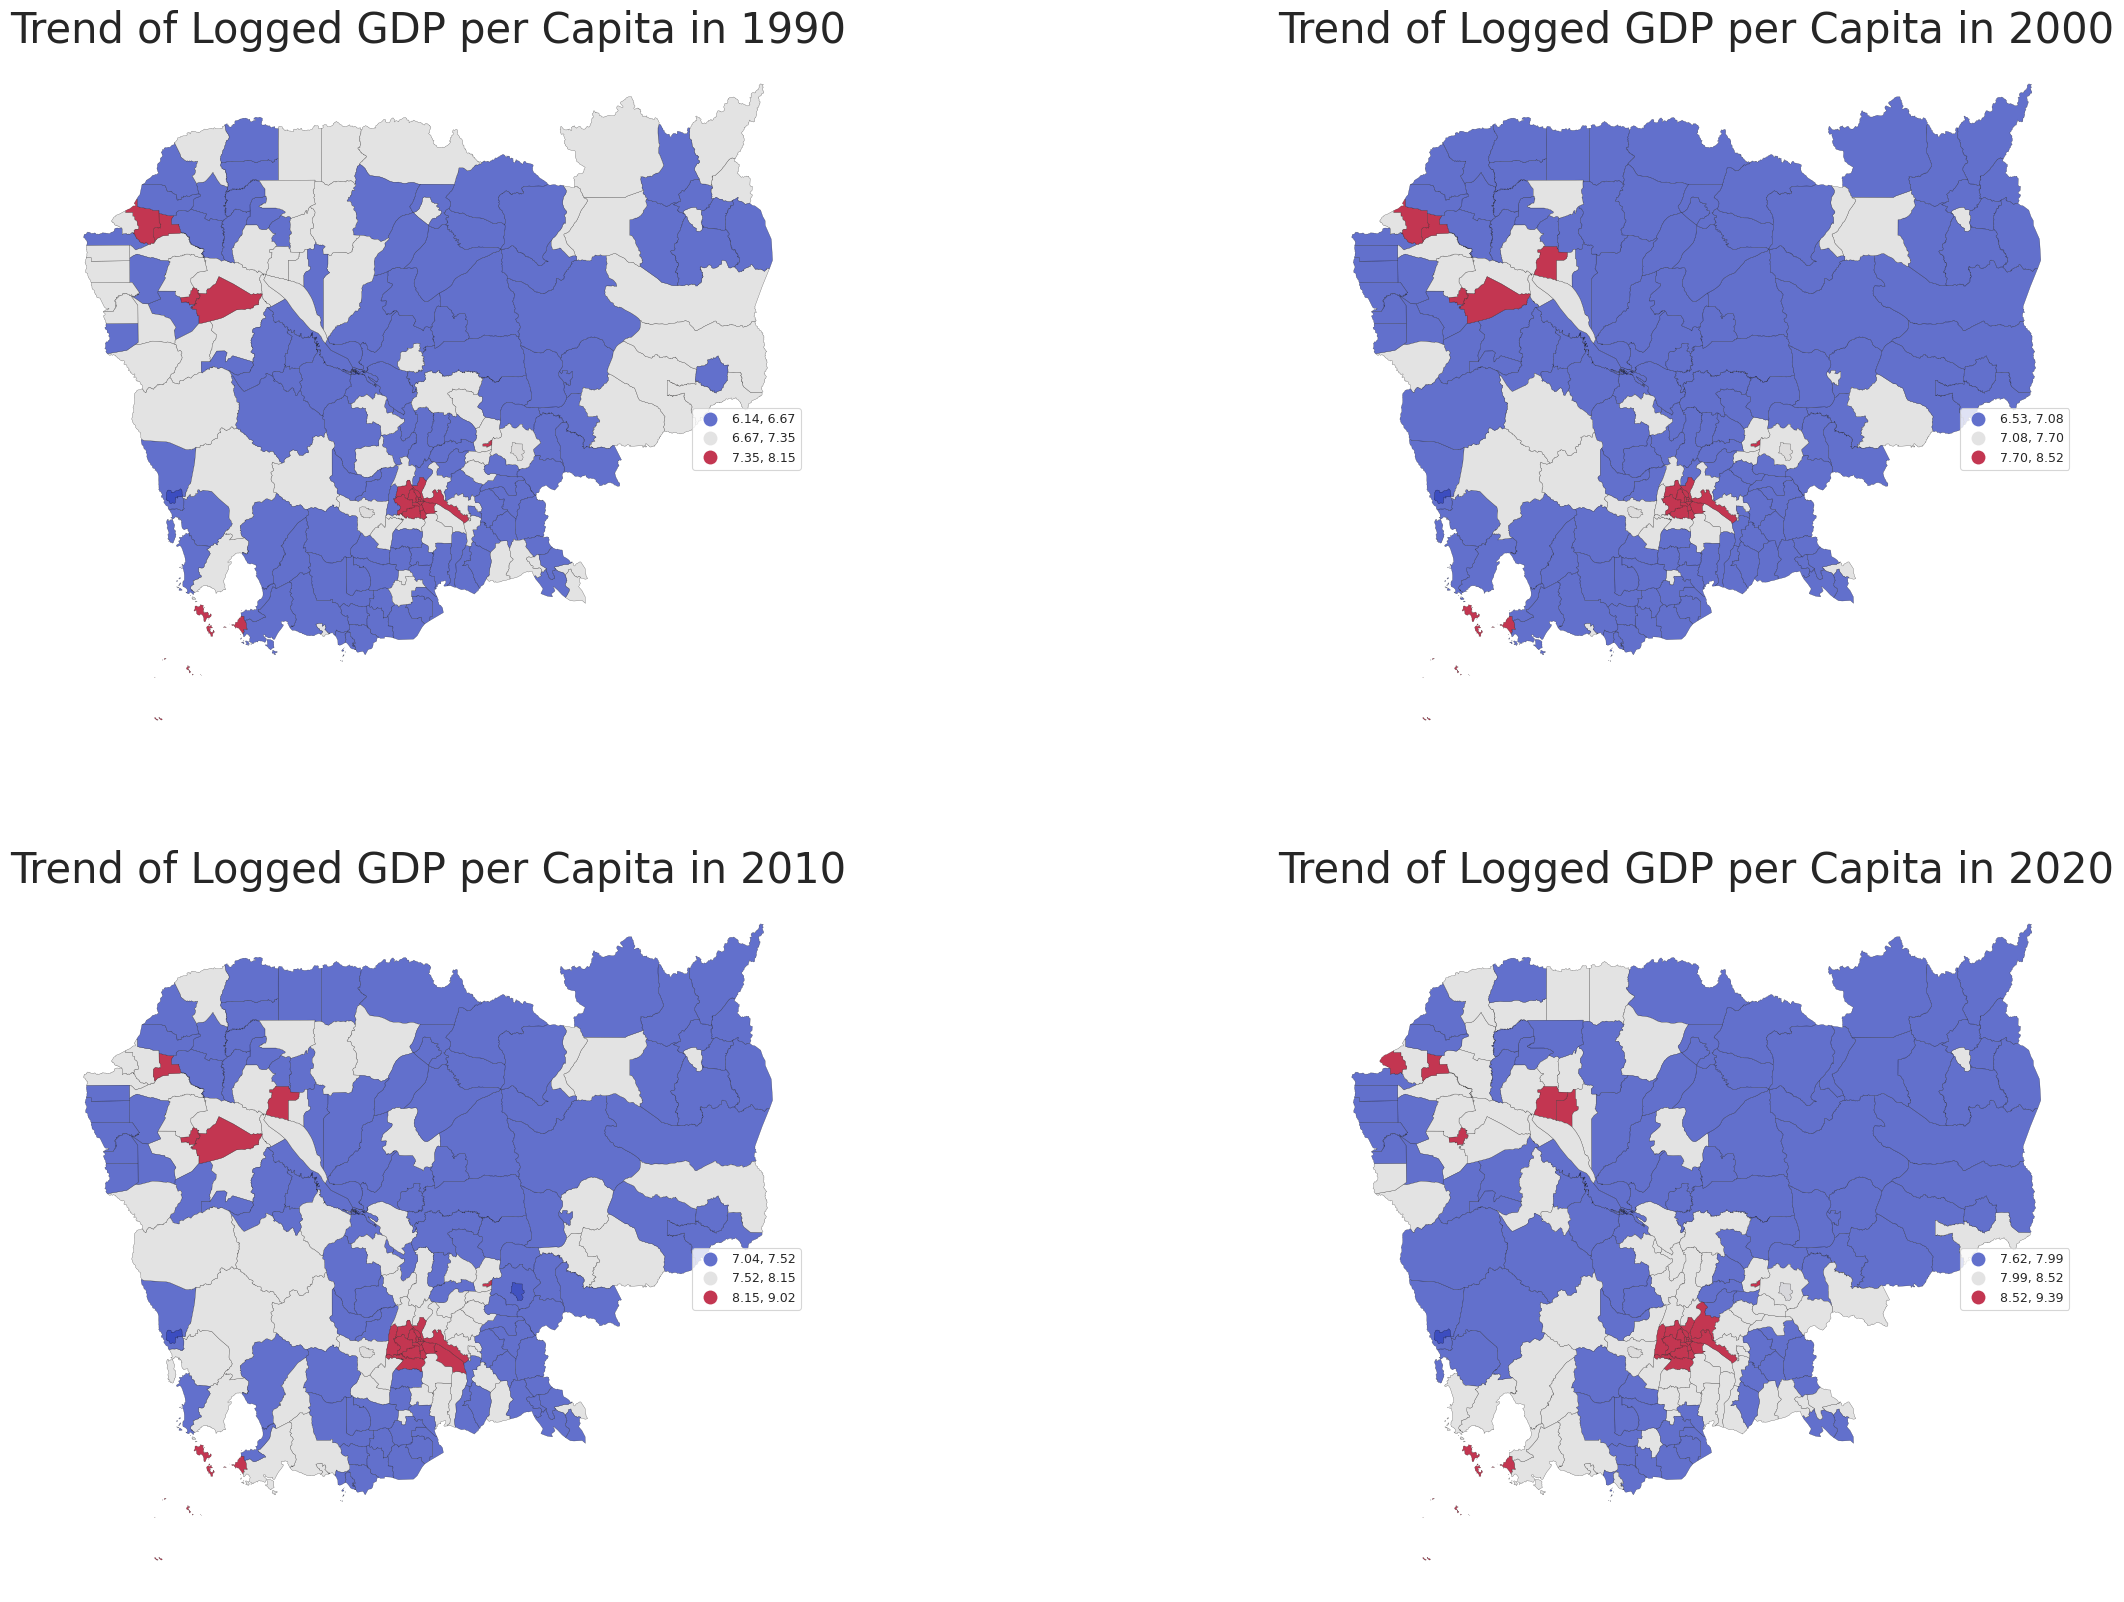

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(30, 20))

gdf_wide.plot(
    column='trend400_ln_y1990',                # Data for coloring
    scheme='FisherJenks',                 # Classification scheme
    k=3,
    cmap='coolwarm',                      # Color map for visualization
    edgecolor='k',                        # Color of edges
    linewidth=0.2,                        # Width of edge lines
    alpha=0.8,                            # Transparency
    legend=True,                          # Show legend
    ax=axes[0,0],                           # Specify the axis for plotting
    legend_kwds={'bbox_to_anchor': (1, 0.5)}  # Legend customization
)
axes[0,0].set_title('Trend of Logged GDP per Capita in 1990', fontsize = 30)
axes[0,0].axis("off")

gdf_wide.plot(
    column='trend400_ln_y2000',                # Data for coloring
    scheme='FisherJenks',                 # Classification scheme
    k=3,
    cmap='coolwarm',                      # Color map for visualization
    edgecolor='k',                        # Color of edges
    linewidth=0.2,                        # Width of edge lines
    alpha=0.8,                            # Transparency
    legend=True,                          # Show legend
    ax=axes[0,1],                           # Specify the axis for plotting
    legend_kwds={'bbox_to_anchor': (1, 0.5)}  # Legend customization
)
axes[0,1].set_title('Trend of Logged GDP per Capita in 2000', fontsize = 30)
axes[0,1].axis("off")

gdf_wide.plot(
    column='trend400_ln_y2010',                # Data for coloring
    scheme='FisherJenks',                 # Classification scheme
    k=3,
    cmap='coolwarm',                      # Color map for visualization
    edgecolor='k',                        # Color of edges
    linewidth=0.2,                        # Width of edge lines
    alpha=0.8,                            # Transparency
    legend=True,                          # Show legend
    ax=axes[1,0],                           # Specify the axis for plotting
    legend_kwds={'bbox_to_anchor': (1, 0.5)}  # Legend customization
)
axes[1,0].set_title('Trend of Logged GDP per Capita in 2010', fontsize = 30)
axes[1,0].axis("off")

gdf_wide.plot(
    column='trend400_ln_y2020',                # Data for coloring
    scheme='FisherJenks',                 # Classification scheme
    k=3,
    cmap='coolwarm',                      # Color map for visualization
    edgecolor='k',                        # Color of edges
    linewidth=0.2,                        # Width of edge lines
    alpha=0.8,                            # Transparency
    legend=True,                          # Show legend
    ax=axes[1,1],                           # Specify the axis for plotting
    legend_kwds={'bbox_to_anchor': (1, 0.5)}  # Legend customization
)
axes[1,1].set_title('Trend of Logged GDP per Capita in 2020', fontsize = 30)
axes[1,1].axis("off")

In [12]:
# Visualize spatial data using the explore() method of a GeoDataFrame
gdf_wide.explore(
    # Specify the column to visualize on the map
    column='trend400_ln_y2022',
    # Specify the attributes to display in the tooltip when hovering over map features
    tooltip=['trend400_ln_y2022', 'district', 'province'],
    # Choose the classification scheme for data visualization
    scheme='fisherjenks',
    # Specify the number of classes for classification
    k=3,
    # Choose the colormap for data visualization
    cmap='coolwarm',
    # Specify whether to display a legend
    legend=True,
    # Choose the basemap tiles provider
    tiles='CartoDB positron',
    # Customize the style of the basemap tiles
    style_kwds=dict(color="gray", weight=0.5),
    # Customize the appearance of the legend
    legend_kwds=dict(colorbar=False)
)

In [18]:
Wqueen = weights.Queen.from_dataframe(gdf_wide, ids = 'id')
W_plot = weights.Queen.from_dataframe(gdf_wide)

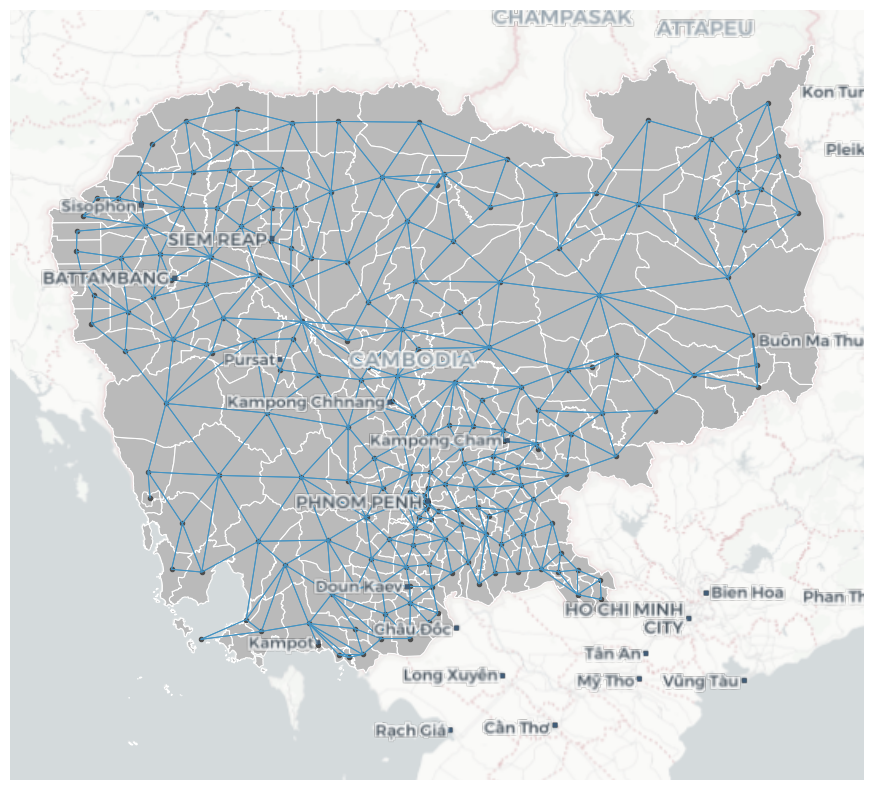

In [24]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(14,10))
plot_spatial_weights(W_plot, gdf_wide, ax=ax)
cx.add_basemap(ax, crs=gdf_wide.crs.to_string(), source = cx.providers.CartoDB.Positron,           attribution=False)
cx.add_basemap(ax, crs=gdf_wide.crs.to_string(), source = cx.providers.CartoDB.PositronOnlyLabels, attribution=False)
plt.show()

In [25]:
# Define a function to calculate moran's I per year
def moran_by_col(y, w=Wqueen):
    mo = esda.Moran(y, w=w)
    mo_s = pd.Series(
        {"I": mo.I, "I-P value": mo.p_sim},
    )
    return mo_s

In [26]:
gdf_wide.columns

Index(['GID_2', 'id', 'province', 'district', 'trend400_ln_y1990',
       'trend400_ln_y1991', 'trend400_ln_y1992', 'trend400_ln_y1993',
       'trend400_ln_y1994', 'trend400_ln_y1995', 'trend400_ln_y1996',
       'trend400_ln_y1997', 'trend400_ln_y1998', 'trend400_ln_y1999',
       'trend400_ln_y2000', 'trend400_ln_y2001', 'trend400_ln_y2002',
       'trend400_ln_y2003', 'trend400_ln_y2004', 'trend400_ln_y2005',
       'trend400_ln_y2006', 'trend400_ln_y2007', 'trend400_ln_y2008',
       'trend400_ln_y2009', 'trend400_ln_y2010', 'trend400_ln_y2011',
       'trend400_ln_y2012', 'trend400_ln_y2013', 'trend400_ln_y2014',
       'trend400_ln_y2015', 'trend400_ln_y2016', 'trend400_ln_y2017',
       'trend400_ln_y2018', 'trend400_ln_y2019', 'trend400_ln_y2020',
       'trend400_ln_y2021', 'trend400_ln_y2022', 'geometry'],
      dtype='object')

In [27]:
columns = ['trend400_ln_y1990',
       'trend400_ln_y1991', 'trend400_ln_y1992', 'trend400_ln_y1993',
       'trend400_ln_y1994', 'trend400_ln_y1995', 'trend400_ln_y1996',
       'trend400_ln_y1997', 'trend400_ln_y1998', 'trend400_ln_y1999',
       'trend400_ln_y2000', 'trend400_ln_y2001', 'trend400_ln_y2002',
       'trend400_ln_y2003', 'trend400_ln_y2004', 'trend400_ln_y2005',
       'trend400_ln_y2006', 'trend400_ln_y2007', 'trend400_ln_y2008',
       'trend400_ln_y2009', 'trend400_ln_y2010', 'trend400_ln_y2011',
       'trend400_ln_y2012', 'trend400_ln_y2013', 'trend400_ln_y2014',
       'trend400_ln_y2015', 'trend400_ln_y2016', 'trend400_ln_y2017',
       'trend400_ln_y2018', 'trend400_ln_y2019', 'trend400_ln_y2020',
       'trend400_ln_y2021', 'trend400_ln_y2022']
array = gdf_wide[columns].to_numpy()

In [35]:
moran_dynamics_ratioW = gdf_wide[columns].apply(moran_by_col, axis=0).T

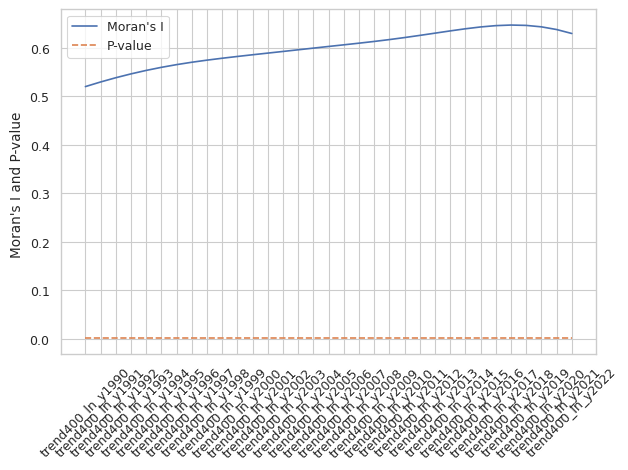

In [36]:
# Plot with significance level
def plot_moran_dynamics_with_significance_level(indicator_data):
    """
    Plot Moran's I and P-value dynamics.

    Parameters:
    - indicator_data: DataFrame or similar structure containing 'I' and 'I-P value' columns.

    Returns:
    None
    """
    # Plot 'I' values
    plt.plot(indicator_data.index, indicator_data['I'], label="Moran's I", linestyle='-')

    # Plot 'I-P value' values
    plt.plot(indicator_data.index, indicator_data['I-P value'], label='P-value', linestyle='--')

    # Adding labels and legend
    plt.xlabel("")
    plt.ylabel("Moran's I and P-value ")
    plt.legend()

    # Adjusting x-axis tick spacing
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

    # Display the combined graph
    plt.tight_layout()  # Ensure all elements fit in the figure
    plt.show()

# Plot over the data
plot_moran_dynamics_with_significance_level(moran_dynamics_ratioW)

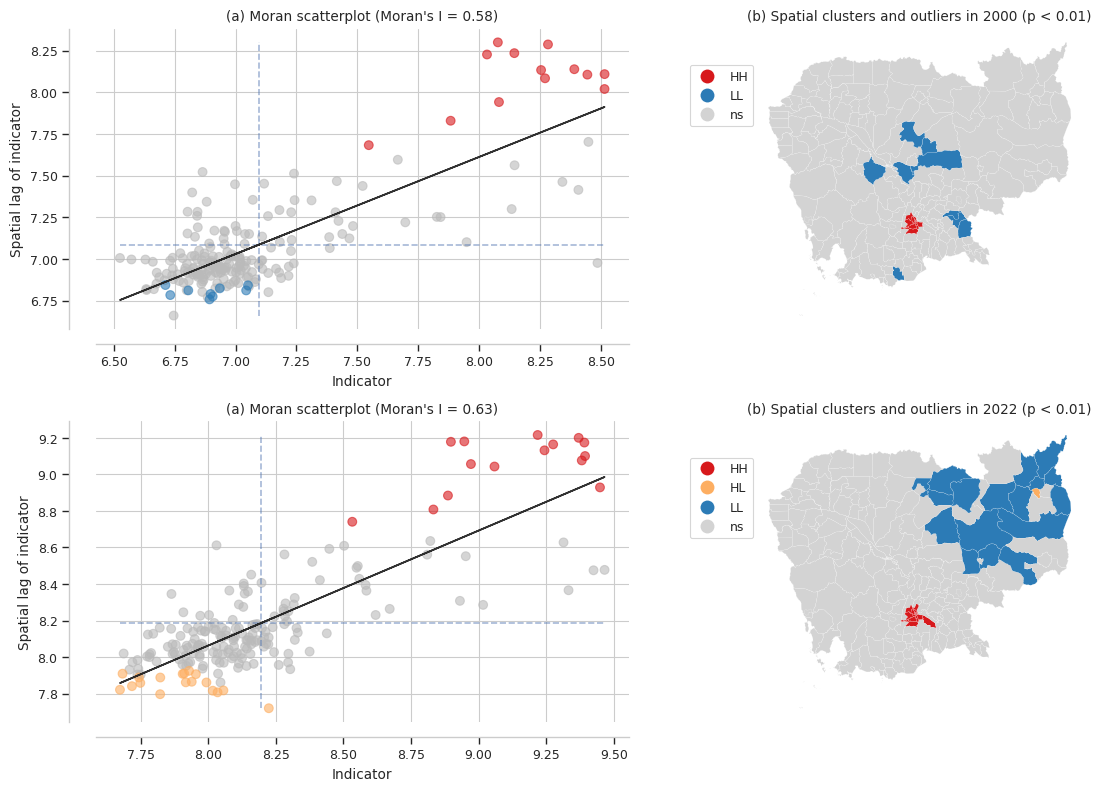

In [39]:
def visualize_spatial_association(gdf_INDICATOR, W, year_var, ax1, ax2):
    """
    Visualize spatial association using Moran's I and Local Indicators of Spatial Association (LISA).

    Parameters:
    - gdf_INDICATOR: GeoDataFrame containing the indicator data for the specified year.
    - W: Spatial weights matrix.
    - year_var: The specific variable name for which spatial association is visualized.
    - ax1, ax2: Matplotlib Axes objects where the plots will be drawn.

    Returns:
    None
    """
    # Extract year from variable name
    year = year_var.replace('trend400_ln_y', '')

    # Calculate global Moran's I
    globalMoran_INDICATOR = Moran(gdf_INDICATOR[year_var], W)
    MoranI_INDICATOR = "{:.2f}".format(globalMoran_INDICATOR.I)

    # Calculate local indicators of spatial association
    localMoran_INDICATOR = Moran_Local(gdf_INDICATOR[year_var], W, permutations=999, seed=12345)

    # Plotting Moran scatterplot
    moran_scatterplot(localMoran_INDICATOR, p=0.01, aspect_equal=False, zstandard=False, ax=ax1)

    # Plotting Local Indicators of Spatial Association (LISA) clusters
    lisa_cluster(localMoran_INDICATOR, gdf_INDICATOR, p=0.01, legend_kwds={'bbox_to_anchor': (0.02, 0.90)}, ax=ax2)

    # Setting labels and titles for the plots
    ax1.set_xlabel('Indicator')
    ax1.set_ylabel('Spatial lag of indicator')
    ax1.set_title(f"(a) Moran scatterplot (Moran's I = {MoranI_INDICATOR})")
    ax2.set_title(f"(b) Spatial clusters and outliers in {year} (p < 0.01)")

# Create a single figure with 1x3 layout for all the years
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Visualize spatial associations for different years, with each subplot in the 1x3 layout
visualize_spatial_association(gdf_wide, Wqueen, 'trend400_ln_y2000', axes[0, 0], axes[0, 1])
visualize_spatial_association(gdf_wide, Wqueen, 'trend400_ln_y2022', axes[1, 0], axes[1, 1])

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure to a file
#plt.savefig('spatial_association_1x2png', dpi=300)

# Show the combined plot
plt.show()